In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
df = pd.read_csv("C:/Users/22s22561/Downloads/breast-cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df = df.drop('id', axis=1)


In [6]:
print(df["diagnosis"].value_counts(ascending=True),'\n\n')


M    212
B    357
Name: diagnosis, dtype: int64 




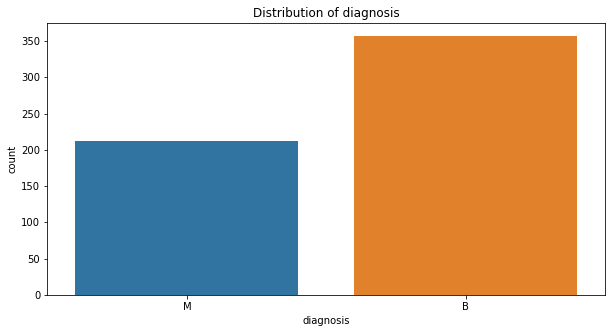

In [7]:
plt.figure(figsize=(10, 5))
sns.countplot(x = df['diagnosis'])
plt.title('Distribution of diagnosis')
plt.show()


In [8]:
y = df.iloc[:, 0].values
X = df.iloc[:,1:].values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,stratify=y)

In [10]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [11]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_norm, y_train)
y_pred = knn.predict(X_test_norm)
print(accuracy_score(y_pred,y_test))

0.935672514619883


In [12]:
lr=LogisticRegression(solver='lbfgs')
lr.fit(X_train_norm, y_train)
y_pred = lr.predict(X_test_norm)
print(accuracy_score(y_test,y_pred))

0.9298245614035088


In [13]:
svc1=SVC(kernel='rbf',C=5)
svc1.fit(X_train_norm, y_train)
y_pred = svc1.predict(X_test_norm)
print(accuracy_score(y_pred,y_test))

0.9590643274853801


In [14]:
dt=DecisionTreeClassifier(max_depth=5)
dt.fit(X_train_norm, y_train)
y_pred = dt.predict(X_test_norm)
print(accuracy_score(y_pred,y_test))

0.9064327485380117


In [15]:
rf=RandomForestClassifier(n_estimators=8,max_depth=6)
rf.fit(X_train_norm, y_train)
y_pred = rf.predict(X_test_norm)
print(accuracy_score(y_pred,y_test))

0.935672514619883


In [16]:
y = df.iloc[:, 0].values
X = df.iloc[:,1:].values

In [17]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [18]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_std, y_train)
y_pred = knn.predict(X_test_std)
print(accuracy_score(y_pred,y_test))

0.9239766081871345


In [19]:
lr=LogisticRegression(solver='lbfgs')
lr.fit(X_train_std, y_train)
y_pred = lr.predict(X_test_std)
print(accuracy_score(y_test,y_pred))

0.9649122807017544


In [20]:
svc1=SVC(kernel='rbf',C=5)
svc1.fit(X_train_std, y_train)
y_pred = svc1.predict(X_test_std)
print(accuracy_score(y_pred,y_test))

0.9590643274853801


In [21]:
dt=DecisionTreeClassifier(max_depth=5)
dt.fit(X_train_std, y_train)
y_pred = dt.predict(X_test_std)
print(accuracy_score(y_pred,y_test))

0.9064327485380117


In [22]:
rf=RandomForestClassifier(n_estimators=8,max_depth=6)
rf.fit(X_train_std, y_train)
y_pred = rf.predict(X_test_std)
print(accuracy_score(y_pred,y_test))

0.9181286549707602
